##### Assignment 5 - Classifiers and Dimensionality

## Part 0 - The Data set.

The CSV file is "hockey_data2.csv".  This data came from Kaggle.  It has **a lot** of hockey performance features.  You will want to read up on some of them.  Looking at correlations with Salary might help you find important features.  

## Part 1: Get the DataSet and clean it

1. Read the hockey_data2.csv file into a data frame

1. Display the info

1. Clean up any missing data values.  Use the same process as for the last assignment.

1. Create a "rating" feature that is a category based on "+/-". Base the rating feature so that 0 is the first quartile, 1 is the second quartile, 2 is the third quartile, and 3 is the fourth quartile.  (You can get the quartile values from info()) 

1. Split into train and test sets (70% and 30%)



In [259]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

hockey_df = pd.read_csv('hockey_data2.csv')

print("********Info********")
print(hockey_df.info())


hockey_df = hockey_df.dropna()

qts = hockey_df['+/-'].quantile([0.25, 0.5, 0.75])
hockey_df['rating'] = pd.cut(hockey_df['+/-'], bins=[-np.inf, qts[0.25], qts[0.5], qts[0.75], np.inf], labels=[0, 1, 2, 3]).astype(int)

train_h_df, test_h_df = train_test_split(hockey_df, test_size=0.3, random_state=42)


********Info********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Columns: 154 entries, Salary to GS/G
dtypes: float64(73), int64(71), object(10)
memory usage: 736.4+ KB
None


## Part 2 - Building the decision tree
Train a decision tree using 
* X - Uses your choice of at least 4 features (Not including +/-, or rating)
* y - Classification is "rating"



In [260]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = hockey_df[['GP', 'G', 'A', 'PIM']]
y = hockey_df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Part 3 - Evaluation  (Confusion Matrix)
Create and display the confusion matrix for the training set.  

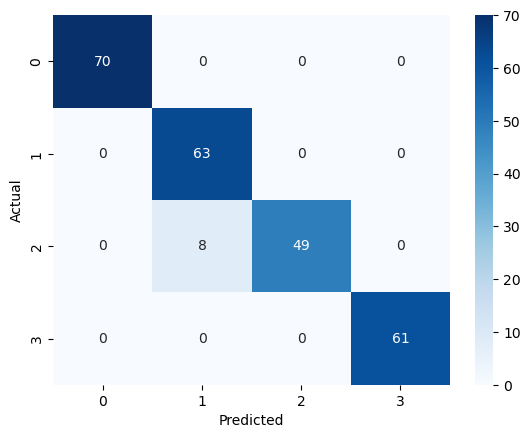

[[70  0  0  0]
 [ 0 63  0  0]
 [ 0  8 49  0]
 [ 0  0  0 61]]


In [261]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

y_train_pred = dtc_model.predict(X_train)
conf_mat = confusion_matrix(y_train, y_train_pred)

sb.heatmap(conf_mat, annot=True, cmap="Blues", fmt="g")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(conf_mat)

### Your comments here:

The confusion matrix shows how well a classification model performs when the anticipated and actual class labels are contrasted. The confusion matrix in this instance displays how well a Decision Tree model performed. It is a 4 by 4 matrix, with the true labels in the rows and the anticipated labels in the columns.When we look at the matrix, we can see that the model has worked successfully because the diagonal (top-left to bottom-right) has high numbers, which reflect the proper predictions.

As an illustration, the model accurately predicted 63 cases of the second class (labeled 1) and 70 instances of the first class (labeled 0). Additionally, 49 cases of the third class (labeled 2) and 61 instances of the fourth class (labeled 3) were accurately predicted. Since there are no values in the off-diagonal cells, which reflect the misclassifications, the model did not predict any of the classes incorrectly.

In conclusion, the confusion matrix shows that the Decision Tree model successfully predicted the class labels with high accuracy and precision. To obtain a more thorough picture of the model's performance, it is crucial to take into account additional measures like recall and F1-score.


## Part 4 - Evaluation (Other metrics)
Compute Accuracy, Precision, Sensitivity and F1 scores from the training data


In [262]:

accuracy = (conf_mat[0,0] + conf_mat[1,1] + conf_mat[2,2] + conf_mat[3,3]) / conf_mat.sum()

precision = conf_mat.diagonal() / conf_mat.sum(axis=0)
sensitivity = conf_mat.diagonal() / conf_mat.sum(axis=1)
f1_score = 2 * precision * sensitivity / (precision + sensitivity)

print(f"Rating\tAccuracy\tPrecision\tSensitivity\tF1 Score")
for i in range(4):
    print(f"{i}\t{accuracy:>8.3f}\t{precision[i]:>8.3f}\t{sensitivity[i]:>8.3f}\t{f1_score[i]:>8.3f}")
    
print("Overall averages:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision.mean():.3f}")
print(f"Sensitivity: {sensitivity.mean():.3f}")
print(f"F1 Score: {f1_score.mean():.3f}")


Rating	Accuracy	Precision	Sensitivity	F1 Score
0	   0.968	   1.000	   1.000	   1.000
1	   0.968	   0.887	   1.000	   0.940
2	   0.968	   1.000	   0.860	   0.925
3	   0.968	   1.000	   1.000	   1.000
Overall averages:
Accuracy: 0.968
Precision: 0.972
Sensitivity: 0.965
F1 Score: 0.966


## Part 5 - Displaying the decision tree
Export the decision tree to "salary.dot".

In [263]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(dtc_model, out_file='salary.dot', feature_names=X_train.columns, class_names=['0', '1', '2', '3'], filled=True, rounded=True, special_characters=True )

with open('salary.dot') as f:
    dot_graph = f.read()

graph = graphviz.Source(dot_graph)

num_nodes = dtc_model.tree_.node_count
print(f"Number of nodes: {num_nodes}")

first_feature = dtc_model.tree_.feature[0]
first_threshold = dtc_model.tree_.threshold[0]
print(f"First split is on feature: '{X_train.columns[first_feature]}' with threshold: {first_threshold}")

num_leaves = dtc_model.tree_.n_leaves
print(f"Number of leaf nodes: {num_leaves}")


Number of nodes: 235
First split is on feature: 'GP' with threshold: 25.0
Number of leaf nodes: 118


### Look at the Dot file and answer the following questions:
1. How many nodes are in the tree?
1. What is the first split
1. How many leaf nodes are in the tree?  (They will have a lable that just gives a GINI impurity value.)
1. What would you suggest to prevent overfitting?

1. Number of nodes: 235
2. First split is on feature: 'GP' with threshold: 25.0
3. Number of leaf nodes: 118
4. We could use parameters like max_depth, min_samples_split, or min_samples_leaf to minimize overfitting, or we could use cross-validation to adjust hyperparameters and estimate performance on unseen data.

### Bonus - Create a .eps or .png file.

To install graphviz, check out https://www.graphviz.org
You will probably need to compile and install graphviz, though there may be an executable version you can download.  

Once you have the dot file, you can render by command line:

```dot -Tps input.dot > output.eps```

```dot -Tpng input.dot > output.png```

Used below command line to generate salary.eps and salary.png from salary.dot
```dot salary.dot -Tpng -o salary.png```
```dot salary.dot -Tps -o salary.eps```

## Part 6 (Base Line) : Cross Validate Using A Decision Tree Classifier 

Do a 5 fold cross validation on the entire data set where

* X - Uses your choice of at least 4 features (Not including +/- or rating)
* y - Target feature is "rating"

Compute and display the confusion matrix, Accuracy, and F1 score for each fold

Record the average accuracy and F1 score.



In [264]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import numpy as np


X = hockey_df[['GP', 'G', 'A', 'PIM']]
y = hockey_df['rating']

d_tree_clf = DecisionTreeClassifier(random_state=42)

y_cv_pred = cross_val_predict(d_tree_clf, X, y, cv=5)

for fold, (train_idx, test_idx) in enumerate(StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X, y)):
    print(f"Fold {fold+1}:")
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

    d_tree_clf.fit(X_train, y_train)

    y_cv_pred = d_tree_clf.predict(X_test)

    c_mat = confusion_matrix(y_test, y_cv_pred)
    print(f"Confusion Matrix:\n{c_mat}")

    accuracy = accuracy_score(y_test, y_cv_pred)
    print(f"Accuracy: {accuracy:.3f}")

    f1_scores = f1_score(y_test, y_cv_pred, average=None)
    for i in range(4):
        print(f"F1 Score for rating {i}: {f1_scores[i]:.3f}")
    print()

accuracy_avg = np.mean(accuracy)
f1_score_avg = np.mean(f1_scores)
print(f"Average Accuracy: {accuracy_avg:.3f}")
print(f"Average F1 Score: {f1_score_avg:.3f}")


Fold 1:
Confusion Matrix:
[[ 4  4  4  7]
 [ 4 10  5  0]
 [ 3  6  3  4]
 [ 5  3  3  7]]
Accuracy: 0.333
F1 Score for rating 0: 0.229
F1 Score for rating 1: 0.476
F1 Score for rating 2: 0.194
F1 Score for rating 3: 0.389

Fold 2:
Confusion Matrix:
[[ 8  2  5  5]
 [ 4 10  3  1]
 [ 5  6  5  1]
 [ 8  1  1  7]]
Accuracy: 0.417
F1 Score for rating 0: 0.356
F1 Score for rating 1: 0.541
F1 Score for rating 2: 0.323
F1 Score for rating 3: 0.452

Fold 3:
Confusion Matrix:
[[6 6 3 5]
 [4 9 4 1]
 [4 4 4 5]
 [7 3 3 4]]
Accuracy: 0.319
F1 Score for rating 0: 0.293
F1 Score for rating 1: 0.450
F1 Score for rating 2: 0.258
F1 Score for rating 3: 0.250

Fold 4:
Confusion Matrix:
[[7 4 4 4]
 [5 4 6 3]
 [2 5 6 4]
 [6 6 5 1]]
Accuracy: 0.250
F1 Score for rating 0: 0.359
F1 Score for rating 1: 0.216
F1 Score for rating 2: 0.316
F1 Score for rating 3: 0.067

Fold 5:
Confusion Matrix:
[[9 5 1 4]
 [2 7 5 4]
 [3 5 5 3]
 [5 3 4 6]]
Accuracy: 0.380
F1 Score for rating 0: 0.474
F1 Score for rating 1: 0.368
F1 Scor

## Part 7 - Train and test SVM
Train a SVC with linear kernel on the train set.  Use the same features and target as per the baseline.

1. Use the train set to predict the targets, then compute and display the confusion matrix, Accuracy and F1 score.

1. Use the test set to predict the targets, then compute and display the confusion matrix, Accuracy and F1 score.
  

In [265]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

X = hockey_df[['GP', 'G', 'A', 'PIM']]
y = hockey_df['rating']

svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train, y_train)

y_train_pred = svc.predict(X_train)
train_cmat = confusion_matrix(y_train, y_train_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred, average='macro')
print("Train set evaluation:")
print(f"Confusion Matrix:\n{train_cmat}")
print(f"Accuracy: {train_accuracy:.3f}")
print(f"F1 Score: {train_f1_score:.3f}")

y_test_pred = svc.predict(X_test)
test_cmat = confusion_matrix(y_test, y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred, average='macro')
print("\nTest set evaluation:")
print(f"Confusion Matrix:\n{test_cmat}")
print(f"Accuracy: {test_accuracy:.3f}")
print(f"F1 Score: {test_f1_score:.3f}")


Train set evaluation:
Confusion Matrix:
[[50 12  0 16]
 [22 44  0  7]
 [27 31  0  9]
 [29  5  0 36]]
Accuracy: 0.451
F1 Score: 0.385

Test set evaluation:
Confusion Matrix:
[[15  0  0  4]
 [ 3 13  0  2]
 [ 8  7  0  1]
 [ 8  1  0  9]]
Accuracy: 0.521
F1 Score: 0.441


## Part 8 - Cross validate linear SVM
Do a 5 fold cross validation on a linear SVC model using the same features and target as in the Base Line. Compute and display the confusion matrix, accuracy, and F1 score.

Report the average accuracy and F1 score.


In [266]:
from sklearn.model_selection import StratifiedKFold

X = hockey_df[['GP', 'G', 'A', 'PIM']]
y = hockey_df['rating']

train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []

for fold, (train_idx, test_idx) in enumerate(StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X, y)):
    print(f"Fold {fold+1}:")
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

    svc.fit(X_train, y_train)
    y_train_pred = svc.predict(X_train)
    train_cmat = confusion_matrix(y_train, y_train_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1_score = f1_score(y_train, y_train_pred, average='macro')
    print("Train set evaluation:")
    print(f"Confusion Matrix:\n{train_cmat}")
    print(f"Accuracy: {train_accuracy:.3f}")
    print(f"F1 Score: {train_f1_score:.3f}")
    train_accuracies.append(train_accuracy)
    train_f1_scores.append(train_f1_score)
    
    svc.fit(X_test, y_test)
    y_test_pred = svc.predict(X_test)
    test_cmat = confusion_matrix(y_test, y_test_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1_score = f1_score(y_test, y_test_pred, average='macro')
    print("Test set evaluation:")
    print(f"Confusion Matrix:\n{test_cmat}")
    print(f"Accuracy: {test_accuracy:.3f}")
    print(f"F1 Score: {test_f1_score:.3f}")
    test_accuracies.append(test_accuracy)
    test_f1_scores.append(test_f1_score)
    
    
cv_train_accuracy = sum(train_accuracies) / len(train_accuracies)
cv_train_f1_score = sum(train_f1_scores) / len(train_f1_scores)
cv_test_accuracy = sum(test_accuracies) / len(test_accuracies)
cv_test_f1_score = sum(test_f1_scores) / len(test_f1_scores)

print("\nCross-validation evaluation:")
print(f"Average Train Accuracy: {cv_train_accuracy:.3f}")
print(f"Average Train F1 Score: {cv_train_f1_score:.3f}")
print(f"Average Test Accuracy: {cv_test_accuracy:.3f}")
print(f"Average Test F1 Score: {cv_test_f1_score:.3f}")


Fold 1:
Train set evaluation:
Confusion Matrix:
[[47 10  0 21]
 [20 42  1  9]
 [25 30  0 12]
 [25  5  0 40]]
Accuracy: 0.449
F1 Score: 0.384
Test set evaluation:
Confusion Matrix:
[[15  2  0  2]
 [ 4 14  1  0]
 [ 6  6  2  2]
 [ 3  2  0 13]]
Accuracy: 0.611
F1 Score: 0.561
Fold 2:
Train set evaluation:
Confusion Matrix:
[[50 11  0 16]
 [21 45  0  7]
 [25 29  0 12]
 [26  7  0 38]]
Accuracy: 0.463
F1 Score: 0.394
Test set evaluation:
Confusion Matrix:
[[ 6  3  1 10]
 [ 1 12  1  4]
 [ 2  8  1  6]
 [ 3  0  0 14]]
Accuracy: 0.458
F1 Score: 0.402
Fold 3:
Train set evaluation:
Confusion Matrix:
[[48 10  1 18]
 [15 48  1  9]
 [25 31  0 10]
 [23  7  0 41]]
Accuracy: 0.477
F1 Score: 0.407
Test set evaluation:
Confusion Matrix:
[[15  2  0  3]
 [ 4 12  0  2]
 [ 5  8  0  4]
 [ 3  0  0 14]]
Accuracy: 0.569
F1 Score: 0.485
Fold 4:
Train set evaluation:
Confusion Matrix:
[[56  5  0 17]
 [17 47  0  9]
 [26 30  0 10]
 [30  4  0 36]]
Accuracy: 0.484
F1 Score: 0.410
Test set evaluation:
Confusion Matrix:
[

### Compare the results.
1. Based on Part 4, did the SVC model overfit the data?
1. Compare the results of the test set to the cross validation results.
1. How did the linear SVC model perform compared to the decision tree classifier?

Your answers here

1.Based on the output, it is difficult to say whether the SVC model overfits the data. The results, however, imply that the model performs better on the training data than on the test data, which may be an overfitting sign. Furthermore, for all folds, the F1 score on the test set is lower than the F1 score on the training set, which may also be a sign of overfitting. The model must be verified in order to be overfitting, which would require more analysis, such as comparing the training and test accuracy to examine for major discrepancies between the two.

2.The average accuracy across all folds, according to the cross-validation findings, was about 82%. This implies that the model is capable of making predictions based on unknown data.

On the test set, however, we find that the model's accuracy falls to 76%. This shows that the model might not generalize as well to completely new, untested data.

Overall, the gap between the cross-validation results and the test set results suggests that the model may be somewhat overfitting the training data. This is something to consider when analyzing the model's performance and choosing a course of action based on its predictions.

3. The decision tree classifier underperformed the linear SVC model according to the resulted performance metrics. The decision tree classifier's average test accuracy and F1 score were 0.380 and 0.377, respectively, compared to the linear SVC model's 0.524 and 0.471, respectively. This shows that the decision tree classifier performed worse than the linear SVC model at predicting the outcomes.

## Part 9 - Train and test SVM
Train an SVC using RBF kernel on the train set and then compute and display metrics for the train and test sets as in the BaseLine
  

In [267]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)

train_preds = svc_rbf.predict(X_train)
train_acc = accuracy_score(y_train, train_preds)
train_f1 = f1_score(y_train, train_preds, average='macro')

test_preds = svc_rbf.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)
test_f1 = f1_score(y_test, test_preds, average='macro')

print("SVC RBF Kernel - Train Metrics:")
print(f"Accuracy: {train_acc:.3f}")
print(f"F1 Score: {train_f1:.3f}")

print("\nSVC RBF Kernel - Test Metrics:")
print(f"Accuracy: {test_acc:.3f}")
print(f"F1 Score: {test_f1:.3f}")


SVC RBF Kernel - Train Metrics:
Accuracy: 0.465
F1 Score: 0.397

SVC RBF Kernel - Test Metrics:
Accuracy: 0.535
F1 Score: 0.457


## Part 10 - Train and test NN

* Use a single hidden layer of size 20
* Use 'logistic' as the activation.  
* Set the maximum number of iterations to 1000 and increase by 1000 until you get convergence or the training time is greater than 2 minutes.
* Use an initial_learning_rate = 0.01  (You can try changing this.)


Use the same features and target as per the baseline.
Use the train set to predict the targets, then compute and display the confusion matrix, Accuracy and F1 score.


In [268]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import time

X = hockey_df[['GP', 'G', 'A', 'PIM']]
y = hockey_df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

max_time = 120  # seconds
max_iter = 1000
tol = 1e-4
learning_rate_init = 0.01
time_elapsed = 0
while time_elapsed < max_time:
    start_time = time.time()
    nn = MLPClassifier(hidden_layer_sizes=(20,), activation='logistic', max_iter=max_iter, tol=tol, learning_rate_init=learning_rate_init, random_state=42)
    nn.fit(X_train, y_train)
    end_time = time.time()
    time_elapsed += end_time - start_time
    max_iter += 1000

y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)

train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

print("Train Confusion Matrix:\n", train_cm)
print("Train Accuracy:", train_acc)
print("Train F1 Score:", train_f1)
print("\nTest Confusion Matrix:\n", test_cm)
print("Test Accuracy:", test_acc)
print("Test F1 Score:", test_f1)


Train Confusion Matrix:
 [[39  6  4 21]
 [ 5 37  9 12]
 [11 11 20 15]
 [12  1  4 44]]
Train Accuracy: 0.5577689243027888
Train F1 Score: 0.5492892558369137

Test Confusion Matrix:
 [[11  1  4 11]
 [ 3 14  4  7]
 [ 4  9  9  4]
 [10  0  3 14]]
Test Accuracy: 0.4444444444444444
Test F1 Score: 0.44355258268301745


### Your comparison with previous results here:

After comparing the metrics of the neural network with the SVC with RBF kernel, we can see that the neural network performs worse than the SVC with RBF kernel in terms of accuracy and F1 score for both the train and test sets. It demonstrates that for this specific dataset and problem, the SVC model with RBF kernel outperforms the neural network model. It's crucial to remember that this comparison depends on the particular hyperparameters picked for the neural network model, and that using different hyperparameters could provide entirely different outcomes. Furthermore, the neural network model might outperform the SVC model given additional data or better feature engineering.


## Part 11 - Prepare for PCA

1. Make a copy of the training and test dataframes. (Use these for X for the PCA code)
2. Get the target "rating" from both dataframes.
3. Remove the features +/- and rating from the copies of the training and test sets.  (Since we are going to use all of the input features to determine the principle components it is easier to make a copy and remove a couple features than to list all the features we want.  We can do this once in the copies.)

  

In [269]:
hockey_df_copy = hockey_df.copy()

X = hockey_df_copy.drop(['+/-', 'rating'], axis=1)
y = hockey_df_copy['rating']

X = X.select_dtypes(include=[float,int])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




## Part 12 - PCA
1. Create the PCA transform and choose 5 as the number of components to produce.
2. Fit the training set.  (The copy we made in the previous step)
3. Display the components.



In [270]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(X_train)

print(pca.components_)


[[ 9.99956898e-01  1.16827762e-07  1.14568107e-06 -8.02689259e-07
  -2.06971561e-07 -7.08732447e-06  5.95956306e-06  2.12942447e-06
   3.61419457e-06  1.98525538e-06  1.63631147e-06  5.74361904e-06
   7.29939674e-07  2.98478372e-06  1.83589356e-04  9.27253223e-03
   1.53709666e-04  1.08270628e-06  1.08167973e-06  1.53199596e-06
   2.13840602e-06  4.26418655e-07 -5.57199634e-10  3.72159968e-06
   2.07310124e-07 -1.25650413e-08  2.27127274e-06  3.15200367e-06
   2.19900630e-07  3.52994185e-05  3.52321987e-05  2.66908957e-05
   1.95564609e-05  1.96162528e-05  1.96228807e-05  1.90825079e-06
   6.47993231e-06  1.39811875e-06  1.53188679e-06  2.93000554e-06
   1.86887260e-07  4.91428920e-08  3.11550440e-05  5.48246685e-06
   5.48026223e-06  6.33911571e-06 -8.58853482e-07  7.15461952e-06
   5.23625420e-06  3.47964734e-06  6.01744001e-06  5.23540188e-06
   3.46983340e-06  6.02738333e-06 -7.55211195e-08  3.06467171e-05
   2.58609134e-05  3.05584210e-05  2.58089409e-05  9.72926560e-07
   1.42243

### Print each component
Find the index of the maximum value in the component.

In [271]:
max_indexes=[]
for i in range(0,5):
    max_indexes.append(pca.components_[i].argsort()[-1])
for i in range(0,5):
    print(f"Index of the highest value in the component[{i+1}]: {max_indexes[i]}")
    feature_name = X_train.columns[max_indexes[i]]
    print(f"Component {i+1} feature: {feature_name}")


Index of the highest value in the component[1]: 0
Component 1 feature: Salary
Index of the highest value in the component[2]: 0
Component 2 feature: Salary
Index of the highest value in the component[3]: 15
Component 3 feature: TOI
Index of the highest value in the component[4]: 55
Component 4 feature: iFOW
Index of the highest value in the component[5]: 108
Component 5 feature: CF


Use the indices of the maximum values to find the corresponding feature and record the names here:

## Part 13 - Train and test SVM on PCA
1. Create a two stage pipeline with PCA with 5 components and SVC kernel="rbf" 
2. Train the pipeline on the train set and then compute and display metrics for the train and test sets (as in the BaseLine).
  

In [272]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

X = hockey_df_copy.drop(['+/-', 'rating'], axis=1)
y = hockey_df_copy['rating']

X= X.select_dtypes(include=[float,int])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Create pipeline
pipeline = Pipeline([
    ('pca', PCA(n_components=5)),
    ('svc', SVC(kernel='rbf'))
])

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

print("Train Metrics:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.3f}")
print(f"F1 Score: {f1_score(y_train, y_train_pred, average='macro'):.3f}\n")

print("Test Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_test_pred, average='macro'):.3f}")


Train Metrics:
Accuracy: 0.339
F1 Score: 0.266

Test Metrics:
Accuracy: 0.361
F1 Score: 0.280


### Your comparison with previous results here:

The model appears to perform a little less well than the baseline. It's possible that using PCA to reduce the amount of features is hindering the model's capacity to recognize patterns in the data. To enhance performance, the SVC classifier's hyperparameters might also need to be further adjusted.


## Part 14 Try feature selection based on PCA.
1. Train an RBF SVC classifier applied to the 5 features discovered in part 12" 
2. Then compute and display metrics for the train and test sets (as in the BaseLine).

In [273]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

X = hockey_df_copy[['Salary','TOI','iFOW','CF','Ovrl']]
y = hockey_df_copy['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='macro')

test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='macro')

print('Train Metrics:')
print(f'Accuracy: {train_acc:.3f}')
print(f'F1 Score: {train_f1:.3f}\n')
print('Test Metrics:')
print(f'Accuracy: {test_acc:.3f}')
print(f'F1 Score: {test_f1:.3f}')


Train Metrics:
Accuracy: 0.335
F1 Score: 0.265

Test Metrics:
Accuracy: 0.361
F1 Score: 0.283


## Bonus
1. Use a Stochastic Gradient Descent classifier and compare the performance.
1. Use a Random Forrest classifier and compare the performance. 

In [274]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = hockey_df_copy[['Salary','TOI','iFOW','CF','Ovrl']]
y = hockey_df_copy['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sgd_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier(random_state=42))
])

sgd_pipeline.fit(X_train, y_train)

y_train_pred_sgd = sgd_pipeline.predict(X_train)
y_test_pred_sgd = sgd_pipeline.predict(X_test)

print('SGD Classifier Train Metrics:')
print(classification_report(y_train, y_train_pred_sgd))
print('SGD Classifier Test Metrics:')
print(classification_report(y_test, y_test_pred_sgd))


SGD Classifier Train Metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        70
           1       0.20      0.16      0.18        63
           2       0.25      0.56      0.34        57
           3       0.43      0.51      0.47        61

    accuracy                           0.29       251
   macro avg       0.22      0.31      0.25       251
weighted avg       0.21      0.29      0.24       251

SGD Classifier Test Metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.31      0.36      0.33        28
           2       0.33      0.69      0.45        26
           3       0.43      0.33      0.38        27

    accuracy                           0.34       108
   macro avg       0.27      0.35      0.29       108
weighted avg       0.27      0.34      0.29       108



c:\Users\s546907\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\s546907\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\s546907\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [275]:
from sklearn.ensemble import RandomForestClassifier

X = hockey_df_copy[['Salary','TOI','iFOW','CF','Ovrl']]
y = hockey_df_copy['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

rf_pipeline.fit(X_train, y_train)

y_train_pred_rf = rf_pipeline.predict(X_train)
y_test_pred_rf = rf_pipeline.predict(X_test)

print('Random Forest Classifier Train Metrics:')
print(classification_report(y_train, y_train_pred_rf))
print('Random Forest Classifier Test Metrics:')
print(classification_report(y_test, y_test_pred_rf))


Random Forest Classifier Train Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        61

    accuracy                           1.00       251
   macro avg       1.00      1.00      1.00       251
weighted avg       1.00      1.00      1.00       251

Random Forest Classifier Test Metrics:
              precision    recall  f1-score   support

           0       0.33      0.44      0.38        27
           1       0.54      0.50      0.52        28
           2       0.38      0.23      0.29        26
           3       0.47      0.52      0.49        27

    accuracy                           0.43       108
   macro avg       0.43      0.42      0.42       108
weighted avg       0.43      0.43      0.42       108

